<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering
---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.3'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset**
---

In [4]:
bostonDataSet = get_data("boston")    # SN is 46
bostonDataSet = bostonDataSet.sample(frac=1)   # Shuffle the dataset

# Boston is regression dataset.
# The values in "medv" columns are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 Download the "boston" dataset to local system** 
---

In [5]:
bostonDataSet.to_csv("bostonDataSet.csv")
from google.colab import files
#files.download('bostonDataSet.csv')          # Uncomment this line

---
### **1.4 "Parameter setting"  for all regression models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [6]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', train_size = 0.7, data_split_shuffle = False, silent=True)


,Description,Value
0,session_id,4357
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.5 "Run and Compare" the model performance**
---

In [7]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2042,12.4447,3.4108,0.8542,0.1475,0.1113,0.453
gbr,Gradient Boosting Regressor,2.3519,13.6389,3.5781,0.8392,0.1588,0.1219,0.094
lightgbm,Light Gradient Boosting Machine,2.4384,13.4574,3.5617,0.8386,0.1616,0.1257,0.086
rf,Random Forest Regressor,2.4621,15.8533,3.8172,0.8141,0.1615,0.1242,0.502
ada,AdaBoost Regressor,2.8740,16.2239,3.9612,0.8065,0.1868,0.1554,0.098
lr,Linear Regression,3.3750,24.6526,4.8083,0.7185,0.2772,0.1740,0.287
ridge,Ridge Regression,3.3468,24.8441,4.8097,0.7172,0.2854,0.1734,0.013
br,Bayesian Ridge,3.3892,25.6449,4.8867,0.7069,0.2739,0.1752,0.014
en,Elastic Net,3.8604,30.0922,5.3578,0.6467,0.2841,0.1887,0.015
lasso,Lasso Regression,3.8615,30.3230,5.3663,0.6465,0.2848,0.1901,0.014


---
### **1.6 "Three line of code" for model comparison for "Insurance" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2391.8191,2.019633e+07,4423.4443,0.8542,0.4006,0.2630,0.088
lightgbm,Light Gradient Boosting Machine,2680.4134,2.211790e+07,4643.4870,0.8413,0.5192,0.3376,0.053
rf,Random Forest Regressor,2551.1485,2.268941e+07,4703.7821,0.8375,0.4517,0.3095,0.552
ada,AdaBoost Regressor,3877.4120,2.519414e+07,4985.0274,0.8205,0.6079,0.6745,0.036
et,Extra Trees Regressor,2566.4732,2.616920e+07,5056.4720,0.8130,0.4645,0.3031,0.501
ridge,Ridge Regression,4058.3605,3.527724e+07,5919.0985,0.7479,0.6114,0.4107,0.013
br,Bayesian Ridge,4054.9258,3.528072e+07,5919.2936,0.7478,0.6070,0.4101,0.015
lr,Linear Regression,4046.2908,3.528285e+07,5919.2252,0.7477,0.6071,0.4086,0.013
lasso,Lasso Regression,4045.8221,3.527890e+07,5918.9604,0.7477,0.6068,0.4086,0.017
llar,Lasso Least Angle Regression,4043.8533,3.528655e+07,5920.1789,0.7477,0.5788,0.4091,0.016


---
### **1.7 "Three line of code" for model comparison for "House" dataset**
---



In [9]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.797151e+04,8.569014e+08,2.811936e+04,8.647000e-01,0.1600,0.1086,0.059
lightgbm,Light Gradient Boosting Machine,1.765447e+04,9.628074e+08,2.989577e+04,8.533000e-01,0.1480,0.1029,0.237
gbr,Gradient Boosting Regressor,1.772928e+04,9.968684e+08,2.993929e+04,8.487000e-01,0.1431,0.1026,0.753
rf,Random Forest Regressor,1.890614e+04,1.085526e+09,3.181633e+04,8.353000e-01,0.1581,0.1113,2.372
omp,Orthogonal Matching Pursuit,1.821973e+04,1.023730e+09,3.024121e+04,8.319000e-01,0.2009,0.1088,0.036
en,Elastic Net,1.972282e+04,1.073369e+09,3.157394e+04,8.317000e-01,0.1605,0.1167,0.213
lasso,Lasso Regression,2.030780e+04,1.148520e+09,3.270286e+04,8.137000e-01,0.2952,0.1243,0.198
et,Extra Trees Regressor,2.082653e+04,1.277819e+09,3.500232e+04,8.023000e-01,0.1757,0.1222,2.539
lr,Linear Regression,2.158269e+04,1.235267e+09,3.394238e+04,7.992000e-01,0.2872,0.1345,0.056
br,Bayesian Ridge,2.334567e+04,1.363165e+09,3.609477e+04,7.835000e-01,0.1941,0.1384,0.271


---
# **2. Regression: working with user dataset**
---
### **2.1 Uploading "user file" from user system**

In [10]:
from google.colab import files
#files.upload()                     # Uncomment this line

---
### **2.2 "Read" the uploaded file**
---

In [11]:
import pandas as pd
#myDataSet = pd.read_csv('Sample1 - Regression data.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                                # Uncomment this line

---
### **2.3 "Compare" the model performance**
---

In [12]:
from pycaret.regression import *

#s = setup(data = myDataSet, target='RMSD', train_size = 0.7, data_split_shuffle = False, silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

---
### **2.4 "Three line of code" for model comparison for "user dataset**
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [13]:
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', train_size = 0.7, data_split_shuffle = False, silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [14]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2191,11.9767,3.3679,0.8585,0.1476,0.1130,0.451
gbr,Gradient Boosting Regressor,2.3253,13.1937,3.5239,0.8448,0.1563,0.1205,0.093
lightgbm,Light Gradient Boosting Machine,2.4170,13.2616,3.5346,0.8411,0.1615,0.1237,0.038
rf,Random Forest Regressor,2.4671,15.4439,3.7852,0.8178,0.1610,0.1254,0.506
ada,AdaBoost Regressor,2.9097,16.5613,3.9799,0.8037,0.1858,0.1564,0.091
knn,K Neighbors Regressor,3.0034,21.3441,4.4262,0.7599,0.1905,0.1455,0.062
huber,Huber Regressor,3.2120,24.9589,4.7683,0.7232,0.3014,0.1654,0.029
br,Bayesian Ridge,3.3077,24.5366,4.7790,0.7217,0.2778,0.1711,0.014
ridge,Ridge Regression,3.3574,24.5762,4.7958,0.7199,0.2783,0.1733,0.014
lr,Linear Regression,3.3750,24.6526,4.8083,0.7186,0.2772,0.1740,0.014


---
### **3.2 Model performance using "Feature Selection"**
---

In [15]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_method = 'classic', feature_selection_threshold = 0.8, train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1926,12.2046,3.3907,0.8579,0.1481,0.1119,0.446
gbr,Gradient Boosting Regressor,2.3316,13.0340,3.5073,0.8455,0.1558,0.1206,0.097
lightgbm,Light Gradient Boosting Machine,2.4384,13.4574,3.5617,0.8386,0.1616,0.1257,0.037
rf,Random Forest Regressor,2.4230,14.7298,3.6913,0.8257,0.1581,0.1228,0.512
ada,AdaBoost Regressor,2.9446,18.3280,4.1949,0.7803,0.1905,0.1558,0.092
lr,Linear Regression,3.3750,24.6526,4.8083,0.7186,0.2772,0.1740,0.014
ridge,Ridge Regression,3.3468,24.8441,4.8097,0.7172,0.2854,0.1734,0.015
br,Bayesian Ridge,3.3892,25.6449,4.8867,0.7069,0.2739,0.1752,0.014
dt,Decision Tree Regressor,3.2160,28.8235,5.0614,0.6537,0.2226,0.1692,0.016
en,Elastic Net,3.8604,30.0925,5.3578,0.6467,0.2841,0.1887,0.015


---
### **3.3 Model performance using "Outlier Removal"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1295,10.6946,3.1803,0.8647,0.1400,0.1075,0.453
gbr,Gradient Boosting Regressor,2.2459,11.2683,3.3007,0.8536,0.1504,0.1159,0.092
rf,Random Forest Regressor,2.3217,12.2173,3.4184,0.8446,0.1516,0.1191,0.586
lightgbm,Light Gradient Boosting Machine,2.4067,12.9997,3.4979,0.8314,0.1538,0.1205,0.037
ada,AdaBoost Regressor,2.9577,16.7606,4.0101,0.7836,0.1871,0.1570,0.083
dt,Decision Tree Regressor,3.1043,23.0647,4.6984,0.6983,0.2177,0.1570,0.025
lr,Linear Regression,3.3678,24.3877,4.7719,0.6971,0.2793,0.1759,0.014
ridge,Ridge Regression,3.3429,24.5801,4.7725,0.6964,0.2915,0.1753,0.014
br,Bayesian Ridge,3.3637,25.2269,4.8369,0.6877,0.2813,0.1759,0.015
en,Elastic Net,3.7908,29.1963,5.2549,0.6298,0.2755,0.1859,0.014


---
### **3.4 Model performance using "Transformation"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2214,12.3832,3.4086,0.8548,0.1483,0.1124,0.442
gbr,Gradient Boosting Regressor,2.3400,12.8330,3.4861,0.8474,0.1536,0.1205,0.092
lightgbm,Light Gradient Boosting Machine,2.4632,13.3367,3.5456,0.8397,0.1595,0.1254,0.039
rf,Random Forest Regressor,2.4480,15.3513,3.7669,0.8182,0.1607,0.1249,0.502
ada,AdaBoost Regressor,3.0794,18.3881,4.2101,0.7795,0.1910,0.1629,0.090
knn,K Neighbors Regressor,3.0326,21.5206,4.4951,0.7483,0.1855,0.1431,0.062
br,Bayesian Ridge,3.4256,22.9567,4.6856,0.7356,0.2355,0.1806,0.015
ridge,Ridge Regression,3.4756,23.1695,4.7163,0.7320,0.2368,0.1830,0.014
lr,Linear Regression,3.4941,23.2874,4.7310,0.7302,0.2374,0.1838,0.013
lar,Least Angle Regression,3.4941,23.2874,4.7310,0.7302,0.2374,0.1838,0.017


---
### **3.5 Model performance using "PCA"**
---

In [18]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.8790,51.4171,7.0637,0.3849,0.2919,0.2447,0.453
knn,K Neighbors Regressor,5.0646,51.8448,7.0674,0.3830,0.2929,0.2505,0.062
lightgbm,Light Gradient Boosting Machine,5.0419,51.8249,7.0647,0.3775,0.2930,0.2510,0.031
gbr,Gradient Boosting Regressor,4.9590,53.0190,7.1380,0.3664,0.2940,0.2474,0.059
et,Extra Trees Regressor,4.9176,54.0502,7.2696,0.3448,0.2975,0.2477,0.398
lr,Linear Regression,5.5667,60.9682,7.7030,0.2865,0.3101,0.2719,0.015
ridge,Ridge Regression,5.5667,60.9681,7.7030,0.2865,0.3101,0.2719,0.013
en,Elastic Net,5.5684,60.9682,7.7030,0.2865,0.3101,0.2720,0.016
lar,Least Angle Regression,5.5667,60.9682,7.7030,0.2865,0.3101,0.2719,0.013
lasso,Lasso Regression,5.5699,60.9694,7.7032,0.2864,0.3102,0.2722,0.014


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [19]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1281,10.6451,3.1827,0.8649,0.1408,0.1080,0.445
gbr,Gradient Boosting Regressor,2.2320,10.9369,3.2581,0.8565,0.1494,0.1155,0.093
rf,Random Forest Regressor,2.3427,12.8899,3.5040,0.8368,0.1535,0.1194,0.504
lightgbm,Light Gradient Boosting Machine,2.4475,13.1491,3.5255,0.8304,0.1581,0.1239,0.040
ada,AdaBoost Regressor,2.8337,15.3205,3.8464,0.7989,0.1834,0.1532,0.096
knn,K Neighbors Regressor,3.0286,21.8669,4.4309,0.7385,0.1904,0.1456,0.064
huber,Huber Regressor,3.1630,24.7279,4.7207,0.7074,0.3081,0.1635,0.030
br,Bayesian Ridge,3.2874,24.1946,4.7382,0.7025,0.2823,0.1724,0.014
ridge,Ridge Regression,3.3459,24.2925,4.7584,0.6992,0.2802,0.1750,0.013
dt,Decision Tree Regressor,3.0695,22.6367,4.6472,0.6977,0.2138,0.1556,0.016


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [20]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.2922,11.9343,3.3278,0.8507,0.1532,0.1200,0.501
gbr,Gradient Boosting Regressor,2.2713,12.1756,3.3315,0.8496,0.1570,0.1206,0.094
et,Extra Trees Regressor,2.1963,12.8957,3.3680,0.8432,0.1480,0.1128,0.451
lightgbm,Light Gradient Boosting Machine,2.3859,13.6074,3.5358,0.8248,0.1567,0.1220,0.038
ada,AdaBoost Regressor,2.9387,16.1196,3.9190,0.7904,0.1858,0.1576,0.089
knn,K Neighbors Regressor,2.9699,21.0840,4.3704,0.7458,0.1866,0.1449,0.062
br,Bayesian Ridge,3.4312,23.3585,4.6895,0.7081,0.2401,0.1829,0.014
huber,Huber Regressor,3.3401,24.7197,4.7475,0.7056,0.2635,0.1740,0.030
ridge,Ridge Regression,3.4986,23.5394,4.7244,0.7017,0.2407,0.1857,0.014
lar,Least Angle Regression,3.5310,23.6423,4.7443,0.6980,0.2410,0.1869,0.018


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [21]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', train_size = 0.7, data_split_shuffle = False, silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7656,11.0934,3.3307,0.6892,0.1729,0.1619
1,1.5451,4.1325,2.0329,0.8345,0.0928,0.0738
2,1.6432,7.5505,2.7478,0.7239,0.0914,0.0661
3,1.7444,4.3789,2.0926,0.3304,0.1094,0.1004
4,3.1066,15.3957,3.9237,0.8663,0.1440,0.1230
5,3.4981,18.6386,4.3172,0.7375,0.1446,0.1097
6,2.6346,11.3618,3.3707,0.8429,0.1141,0.0919
7,2.1686,9.3276,3.0541,0.8877,0.0825,0.0625
8,1.9379,6.3773,2.5253,0.7651,0.0991,0.0830
9,2.3610,8.3505,2.8897,0.4275,0.1278,0.1167


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.create_model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [22]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [23]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.908000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.201000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.871001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.533001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.504001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.077001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.730000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.983000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.893000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.905000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

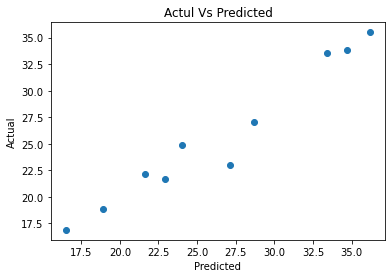

In [24]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 "Save" the prediction results to csv** 
---

In [25]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.7 Download the "result file" to user local system** 
---

In [26]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.8 "Save" the trained model** 
---

In [27]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **4.9 Download the "trained model file" to user local system** 
---

In [28]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.10.1 Upload the  "Trained Model"**


In [29]:
from google.colab import files
#files.upload()                    # Uncomment this line

---
### **4.10.2 Load the "Model"**
---

In [30]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

---
### **4.10.3 Make the prediction on "new unseen dataset"**
---

In [31]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.908000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.201000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.871001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.533001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.504001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.077001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.730000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.983000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.893000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.905000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [32]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7656,11.0934,3.3307,0.6892,0.1729,0.1619
1,1.5451,4.1325,2.0329,0.8345,0.0928,0.0738
2,1.6432,7.5505,2.7478,0.7239,0.0914,0.0661
3,1.7444,4.3789,2.0926,0.3304,0.1094,0.1004
4,3.1066,15.3957,3.9237,0.8663,0.1440,0.1230
5,3.4981,18.6386,4.3172,0.7375,0.1446,0.1097
6,2.6346,11.3618,3.3707,0.8429,0.1141,0.0919
7,2.1686,9.3276,3.0541,0.8877,0.0825,0.0625
8,1.9379,6.3773,2.5253,0.7651,0.0991,0.0830
9,2.3610,8.3505,2.8897,0.4275,0.1278,0.1167


---
### **5.2 Plot the "error"**
---

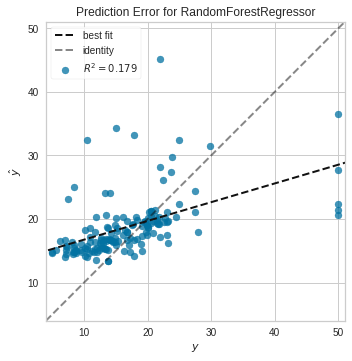

In [33]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

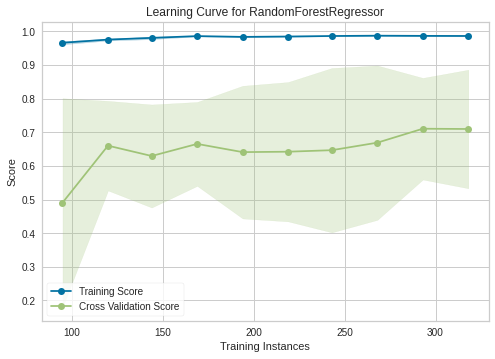

In [34]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

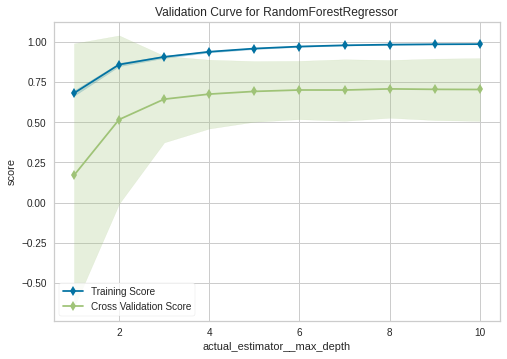

In [35]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [36]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.plot_model"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


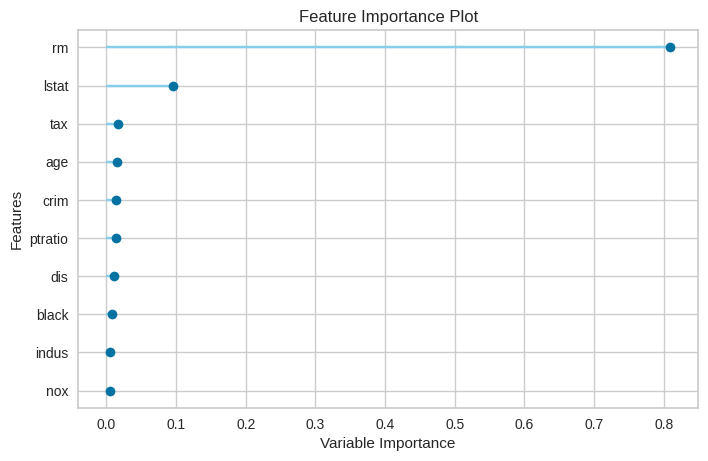

In [37]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

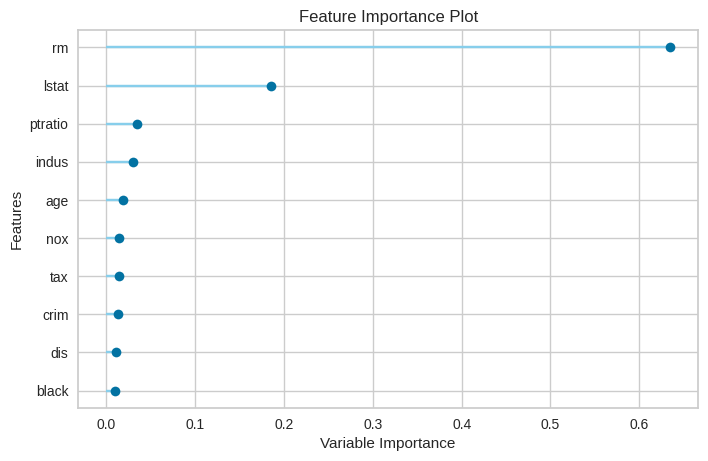

In [38]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

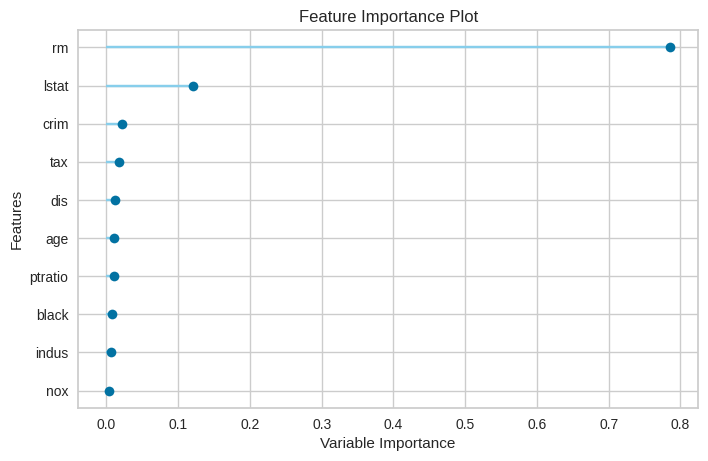

In [39]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [44]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.2250,24.4219,4.9419,0.3158,0.2419,0.2385
1,2.5444,13.2978,3.6466,0.4673,0.1630,0.1286
2,2.6778,12.2344,3.4978,0.5526,0.1290,0.1093
3,2.9694,16.4764,4.0591,-1.5196,0.1953,0.1710
4,3.4371,18.7489,4.3300,0.8372,0.1827,0.1413
5,3.2943,16.4157,4.0516,0.7688,0.1372,0.1060
6,3.4114,21.4526,4.6317,0.7033,0.1529,0.1195
7,3.8457,29.5051,5.4319,0.6447,0.1531,0.1168
8,3.1971,16.6054,4.0750,0.3884,0.1564,0.1368
9,2.4314,8.1437,2.8537,0.4416,0.1239,0.1168


#### **Get the "parameters" of Decision Tree**

In [41]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [42]:
dtModelTuned = tune_model(dtModel, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.5340,18.4500,4.2953,0.4831,0.2126,0.2002
1,2.2262,8.6658,2.9438,0.6528,0.1273,0.1057
2,2.7433,14.1122,3.7566,0.4839,0.1359,0.1172
3,1.9770,7.2845,2.6990,-0.1139,0.1414,0.1177
4,3.1788,14.4809,3.8054,0.8743,0.1601,0.1319
5,3.8850,23.6544,4.8636,0.6668,0.1601,0.1194
6,3.3302,16.4862,4.0603,0.7720,0.1458,0.1177
7,2.9985,15.7298,3.9661,0.8106,0.1140,0.0896
8,2.3655,9.3627,3.0599,0.6552,0.1156,0.0982
9,2.2139,8.9620,2.9937,0.3855,0.1331,0.1096


#### **Get the "tuned parameters" of Decision Tree**

In [43]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,13
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,6
min_samples_split,5
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.tune_model"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.automl">Click Here</a>**


---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.deploy_model">Click Here</a>**
